# Tables of Contents

Import libraries and data

#### Key Questions
1. Busiest Days and Times
2. Spending Patterns
3. Product Price Range
4. High Frequency Departments
5. Customer Loyalty
6. Ordering Habits by Customer Loyalty

In [8]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [10]:
# Importing data

path = r'C:\Users\nodnarb\Documents\IC Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset.pkl'))

### 1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

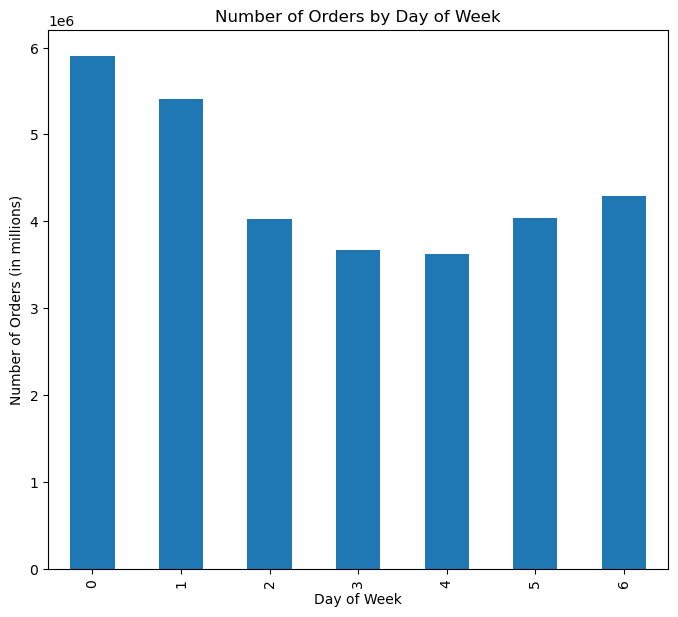

In [4]:
# Bar chart for busiest days of the week

daily_orders = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders (in millions)')
plt.gcf().set_size_inches(8, 7)

In [5]:
# Exporting chart

daily_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '1_daily_orders_bar.png'))

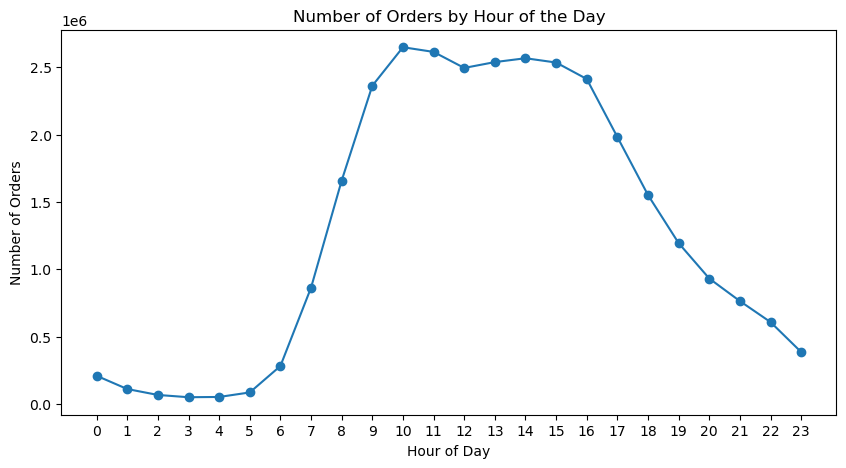

In [6]:
# Busiest hours of the day 

busiest_hours = df['order_time'].value_counts().sort_index()

busiest_hours_line = plt.figure(figsize = (10,5))
plt.plot(busiest_hours.index, busiest_hours.values, marker='o')
plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.show()

In [7]:
# Exporting data

busiest_hours_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '2_orders_by_hour_line.png'))

### 2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [9]:
# Chart exported from previous exercise

### 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [15]:
# Frequency of products sold

df['price_range_loc'].value_counts()

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: count, dtype: int64

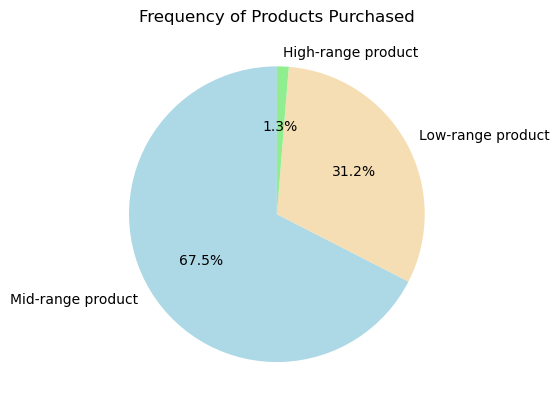

In [16]:
# Plotting pie chart

price_range = df['price_range_loc'].value_counts().plot.pie(
    autopct = '%1.1f%%', 
    startangle = 90,
    colors = ['lightblue', 'wheat', 'lightgreen'])

plt.title('Frequency of Products Purchased')
plt.ylabel('')
plt.show()

In [17]:
# Exporting data

price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '3_price_range_frequency.png'))

Text(0.5, 1.0, 'Frequency of Product Orders by Department')

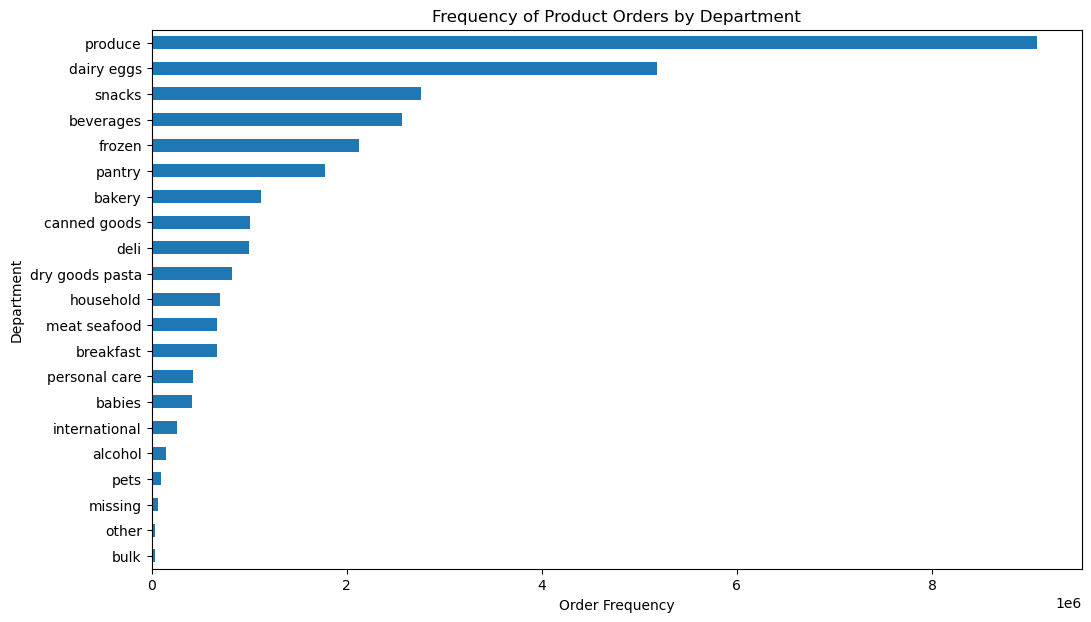

In [18]:
# Frequency of product orders by department

department_freq = df['department'].value_counts().plot.barh()

plt.gca().invert_yaxis()
plt.gcf().set_size_inches(12, 7)
plt.xlabel('Order Frequency')
plt.ylabel('Department')
plt.title('Frequency of Product Orders by Department')

In [19]:
# Exporting data

department_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4_department_frequency.png'))

#### 4. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

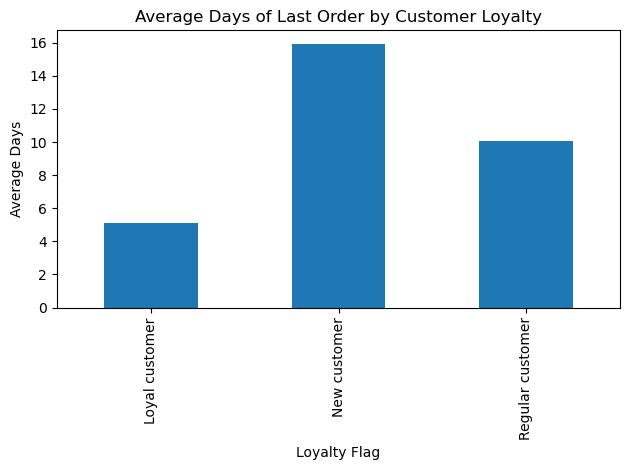

In [21]:
# Create brand loyalty list by average median days of prior order

brand_loyalty = df.groupby('loyalty_flag').agg({'median_days_of_prior_order': ['mean']}).plot.bar(legend = '')   

plt.title('Average Days of Last Order by Customer Loyalty')
plt.xlabel('Loyalty Flag')
plt.ylabel('Average Days')
plt.tight_layout()

In [22]:
# Exporting data

brand_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '5_loyalty_frequency_order.png'))

In [11]:
# Integrating total spent column by user id and prices

df['total_spent'] = df.groupby(['user_id'])['prices'].transform(np.sum)

C:\Users\nodnarb\AppData\Local\Temp\ipykernel_8012\4045708124.py:3: FutureWarning: The provided callable <function sum at 0x000002BE2599A160> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['total_spent'] = df.groupby(['user_id'])['prices'].transform(np.sum)


In [24]:
# Showing all columns

pd.set_option('display.max_columns', None)

In [25]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_times,max_orders,loyalty_flag,average_spending,spending_flag,median_days_of_prior_order,frequency_flag,gender,state,date_joined,n_dependants,fam_status,income,age_group,region,income_bracket,dependents_flag,department,_merge,customer_activity,customer_profile,total_spent
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,2/17/2019,3,married,40423,middle aged adult,south,lower class,has dependents,beverages,both,Normal activity,"married, middle aged adult",375.7
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,2/17/2019,3,married,40423,middle aged adult,south,lower class,has dependents,dairy eggs,both,Normal activity,"married, middle aged adult",375.7
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,2/17/2019,3,married,40423,middle aged adult,south,lower class,has dependents,snacks,both,Normal activity,"married, middle aged adult",375.7
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,2/17/2019,3,married,40423,middle aged adult,south,lower class,has dependents,snacks,both,Normal activity,"married, middle aged adult",375.7
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,2/17/2019,3,married,40423,middle aged adult,south,lower class,has dependents,household,both,Normal activity,"married, middle aged adult",375.7


In [26]:
# Creating crosstab for spending and loyalty flag

loyal_breakdown = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna=False)

In [27]:
print(loyal_breakdown)

spending_flag     High spender  Low spender
loyalty_flag                               
Loyal customer          216600     10067493
New customer             84011      4719684
Regular customer        302814     15573962


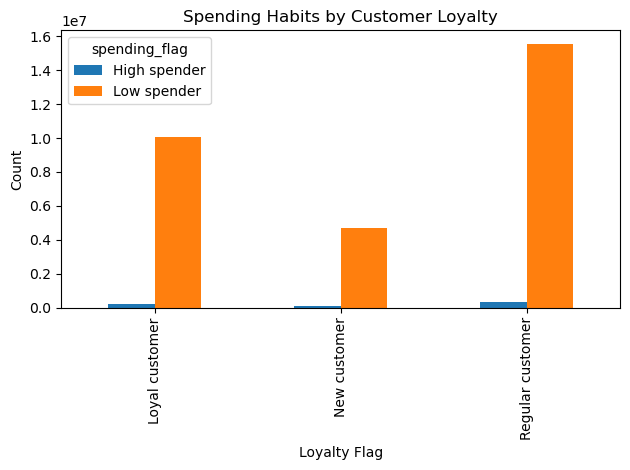

In [28]:
# Creating crosstab for spending/loyalty crosstab

loyal_break_bar = loyal_breakdown.plot.bar()

plt.title('Spending Habits by Customer Loyalty')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6_loyal_spending.png'))

In [29]:
# Creating crosstab for loyalty and customer profile

loyal_profile = pd.crosstab(df['customer_profile'], df['loyalty_flag'])

In [30]:
print(loyal_profile)

loyalty_flag                                   Loyal customer  New customer  \
customer_profile                                                              
divorced/widowed, old adult                            882722        403781   
living with parents and siblings, young adult          492749        221779   
married, middle aged adult                            3621189       1688674   
married, old adult                                    2632051       1246194   
married, young adult                                   949260        445783   
single, middle aged adult                             1234874        564613   
single, young adult                                    471248        232871   

loyalty_flag                                   Regular customer  
customer_profile                                                 
divorced/widowed, old adult                             1358768  
living with parents and siblings, young adult            766644  
married, middle aged adu

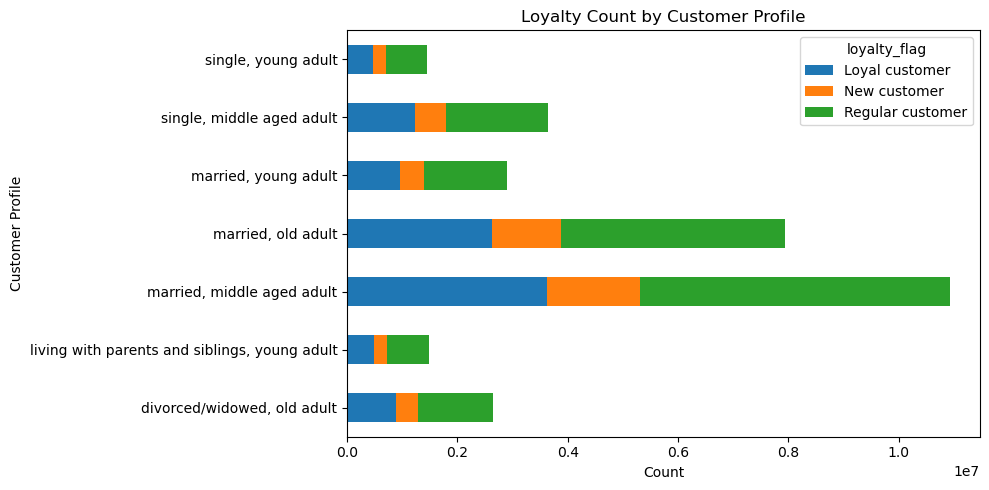

In [31]:
# Creating chart for crosstab

loyal_prof_bar = loyal_profile.plot.barh(stacked = True,
                                        figsize = (10,5))

plt.title('Loyalty Count by Customer Profile')
plt.xlabel('Count')
plt.ylabel('Customer Profile')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '7_loyal_profile.png'))

#### 5. Are there differences in ordering habits based on a customer's loyalty status?



In [33]:
# Creating aggregation for loyalty and order time

order_loyal = pd.crosstab(df['order_time'], df['loyalty_flag'])

print(order_loyal)

loyalty_flag  Loyal customer  New customer  Regular customer
order_time                                                  
0                      61748         35311            110983
1                      30179         20674             58768
2                      17788         12241             35662
3                      13374          9510             25912
4                      16882          8442             25439
5                      29350         12475             42593
6                     112865         33901            134247
7                     346694        102170            414349
8                     643895        208124            807091
9                     882740        313143           1167728
10                    937669        382409           1329666
11                    873024        402684           1339172
12                    807001        394610           1294184
13                    824465        409847           1304964
14                    83

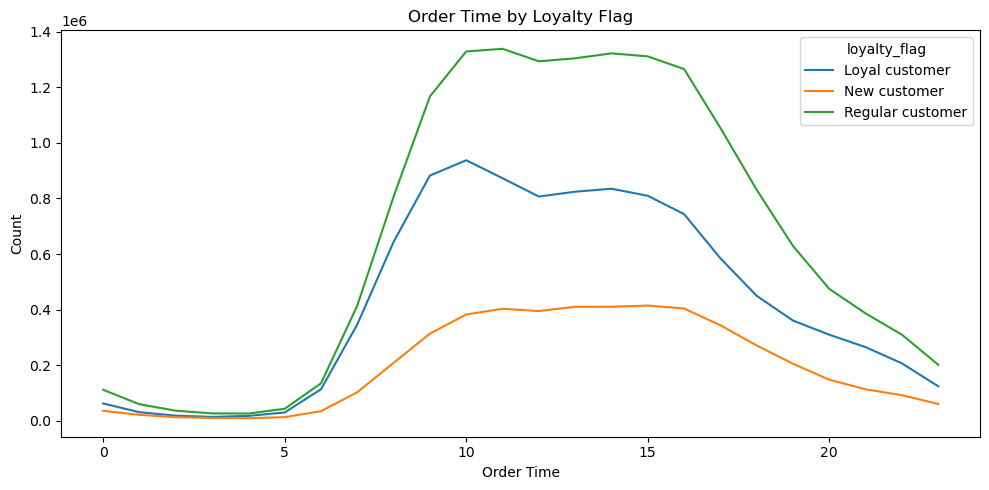

In [34]:
# PLotting chart

order_loyal_line = order_loyal.plot.line(figsize = (10,5))

plt.title('Order Time by Loyalty Flag')
plt.xlabel('Order Time')
plt.ylabel('Count')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9_loyal_order_time.png'))

In [35]:
# Creating aggregation for loyalty and order day

order_day = pd.crosstab(df['orders_day_of_week'], df['loyalty_flag'])

print(order_day)

loyalty_flag        Loyal customer  New customer  Regular customer
orders_day_of_week                                                
0                          1754731        984879           3169000
1                          1843401        818902           2749383
2                          1352343        625288           2047075
3                          1266495        560418           1842622
4                          1292042        535931           1797021
5                          1456715        587718           1989296
6                          1318366        690559           2282379


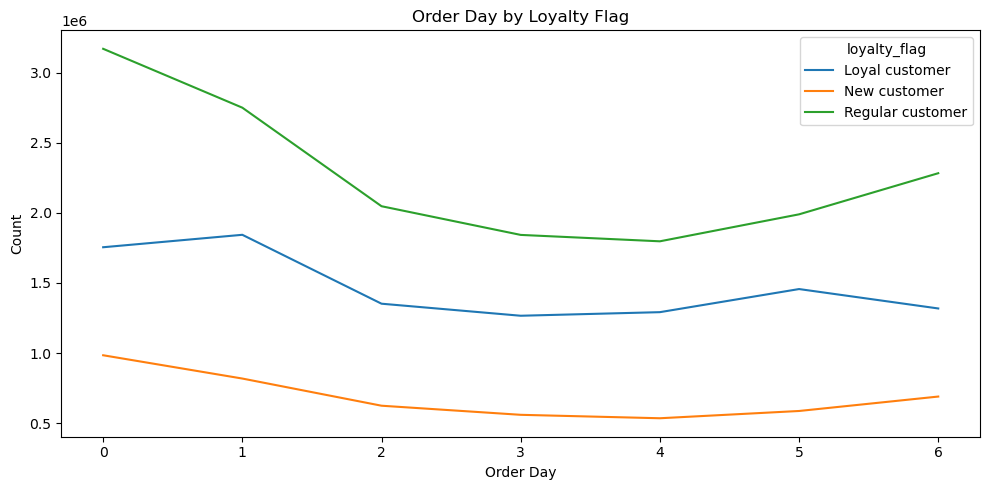

In [36]:
# PLotting chart

order_day_line = order_day.plot.line(figsize = (10,5))

plt.title('Order Day by Loyalty Flag')
plt.xlabel('Order Day')
plt.ylabel('Count')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '10_loyal_order_day.png'))

#### 6. Are there differences in ordering habits based on a customer's region?


In [38]:
# Creating cross tab for region and order time

region_order = pd.crosstab(df['order_time'], df['region'])

print(region_order)

region      midwest  northeast   south    west
order_time                                    
0             48192      36600   69767   53483
1             25879      20529   35769   27444
2             16136      11842   20668   17045
3             11298       8843   16458   12197
4             12015       9043   17277   12428
5             19061      14733   29571   21053
6             64885      49025   95583   71520
7            201794     154031  288357  219031
8            384854     294134  559785  420337
9            552468     414092  791570  605481
10           621555     464454  885590  678145
11           614330     461204  867995  671351
12           583145     443358  827945  641347
13           589852     450628  840883  657913
14           596442     454392  851916  665153
15           598686     447558  839925  649797
16           568750     424062  800862  620007
17           467191     348360  659238  507556
18           368875     272247  515725  394337
19           

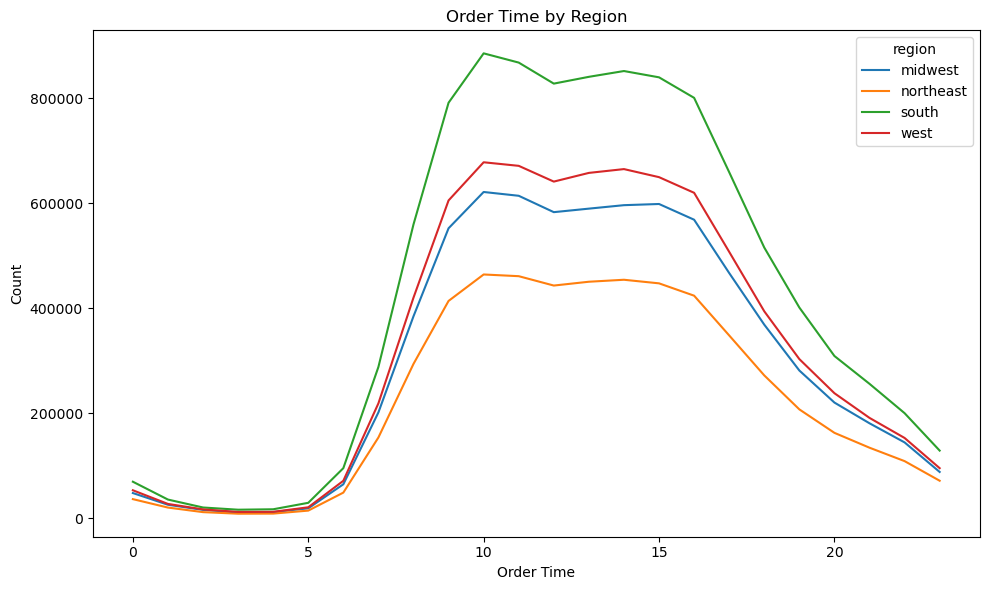

In [39]:
# Plotting chart

region_order_line = region_order.plot.line(figsize = (10,6))

plt.title('Order Time by Region')
plt.xlabel('Order Time')
plt.ylabel('Count')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '11_time_region.png'))

In [40]:
# Creating cross tab for region and order day

region_day = pd.crosstab(df['orders_day_of_week'], df['region'])

print(region_day)

region              midwest  northeast    south     west
orders_day_of_week                                      
0                   1390189    1043698  1955352  1519371
1                   1263655     954332  1808348  1385351
2                    947370     713159  1340387  1023790
3                    855316     649305  1229002   935912
4                    851501     637781  1205497   930215
5                    943396     716128  1342849  1031356
6                   1010086     750282  1429704  1101232


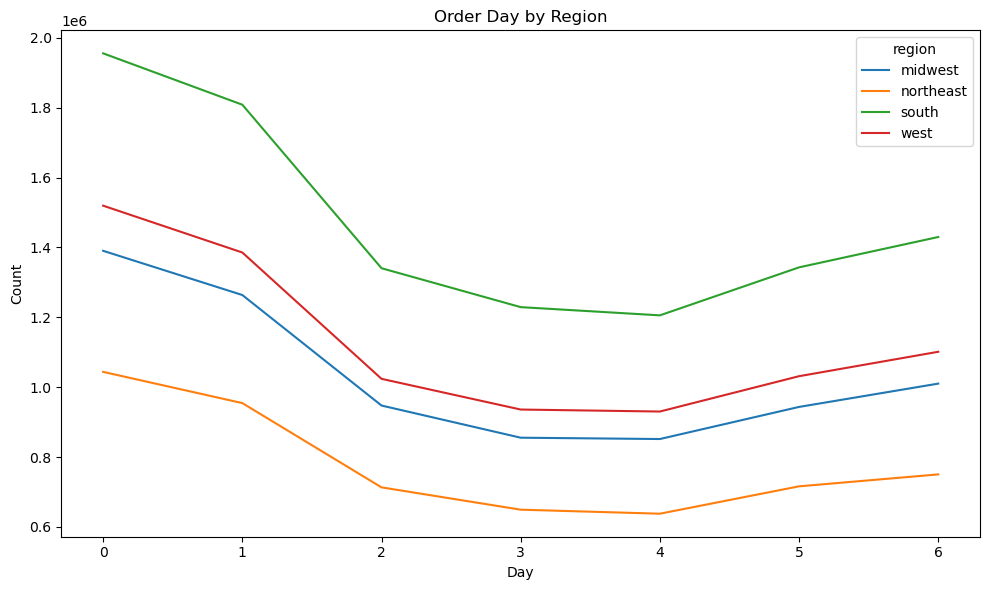

In [41]:
# Plotting chart

region_day_line = region_day.plot.line(figsize = (10,6))

plt.title('Order Day by Region')
plt.xlabel('Day')
plt.ylabel('Count')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '12_day_region.png'))